In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import glob

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from vectran.data.graphics.graphics import VectorImage
from vectran.renderers.cairo import render as cairo_render

from fieldlearn.data_generation.polyvector import compute_field, smooth_field
from fieldlearn.drawing import draw_polyvector_field, draw_polyvector_field_dif

100%|██████████| 5/5 [00:31<00:00,  6.26s/it]


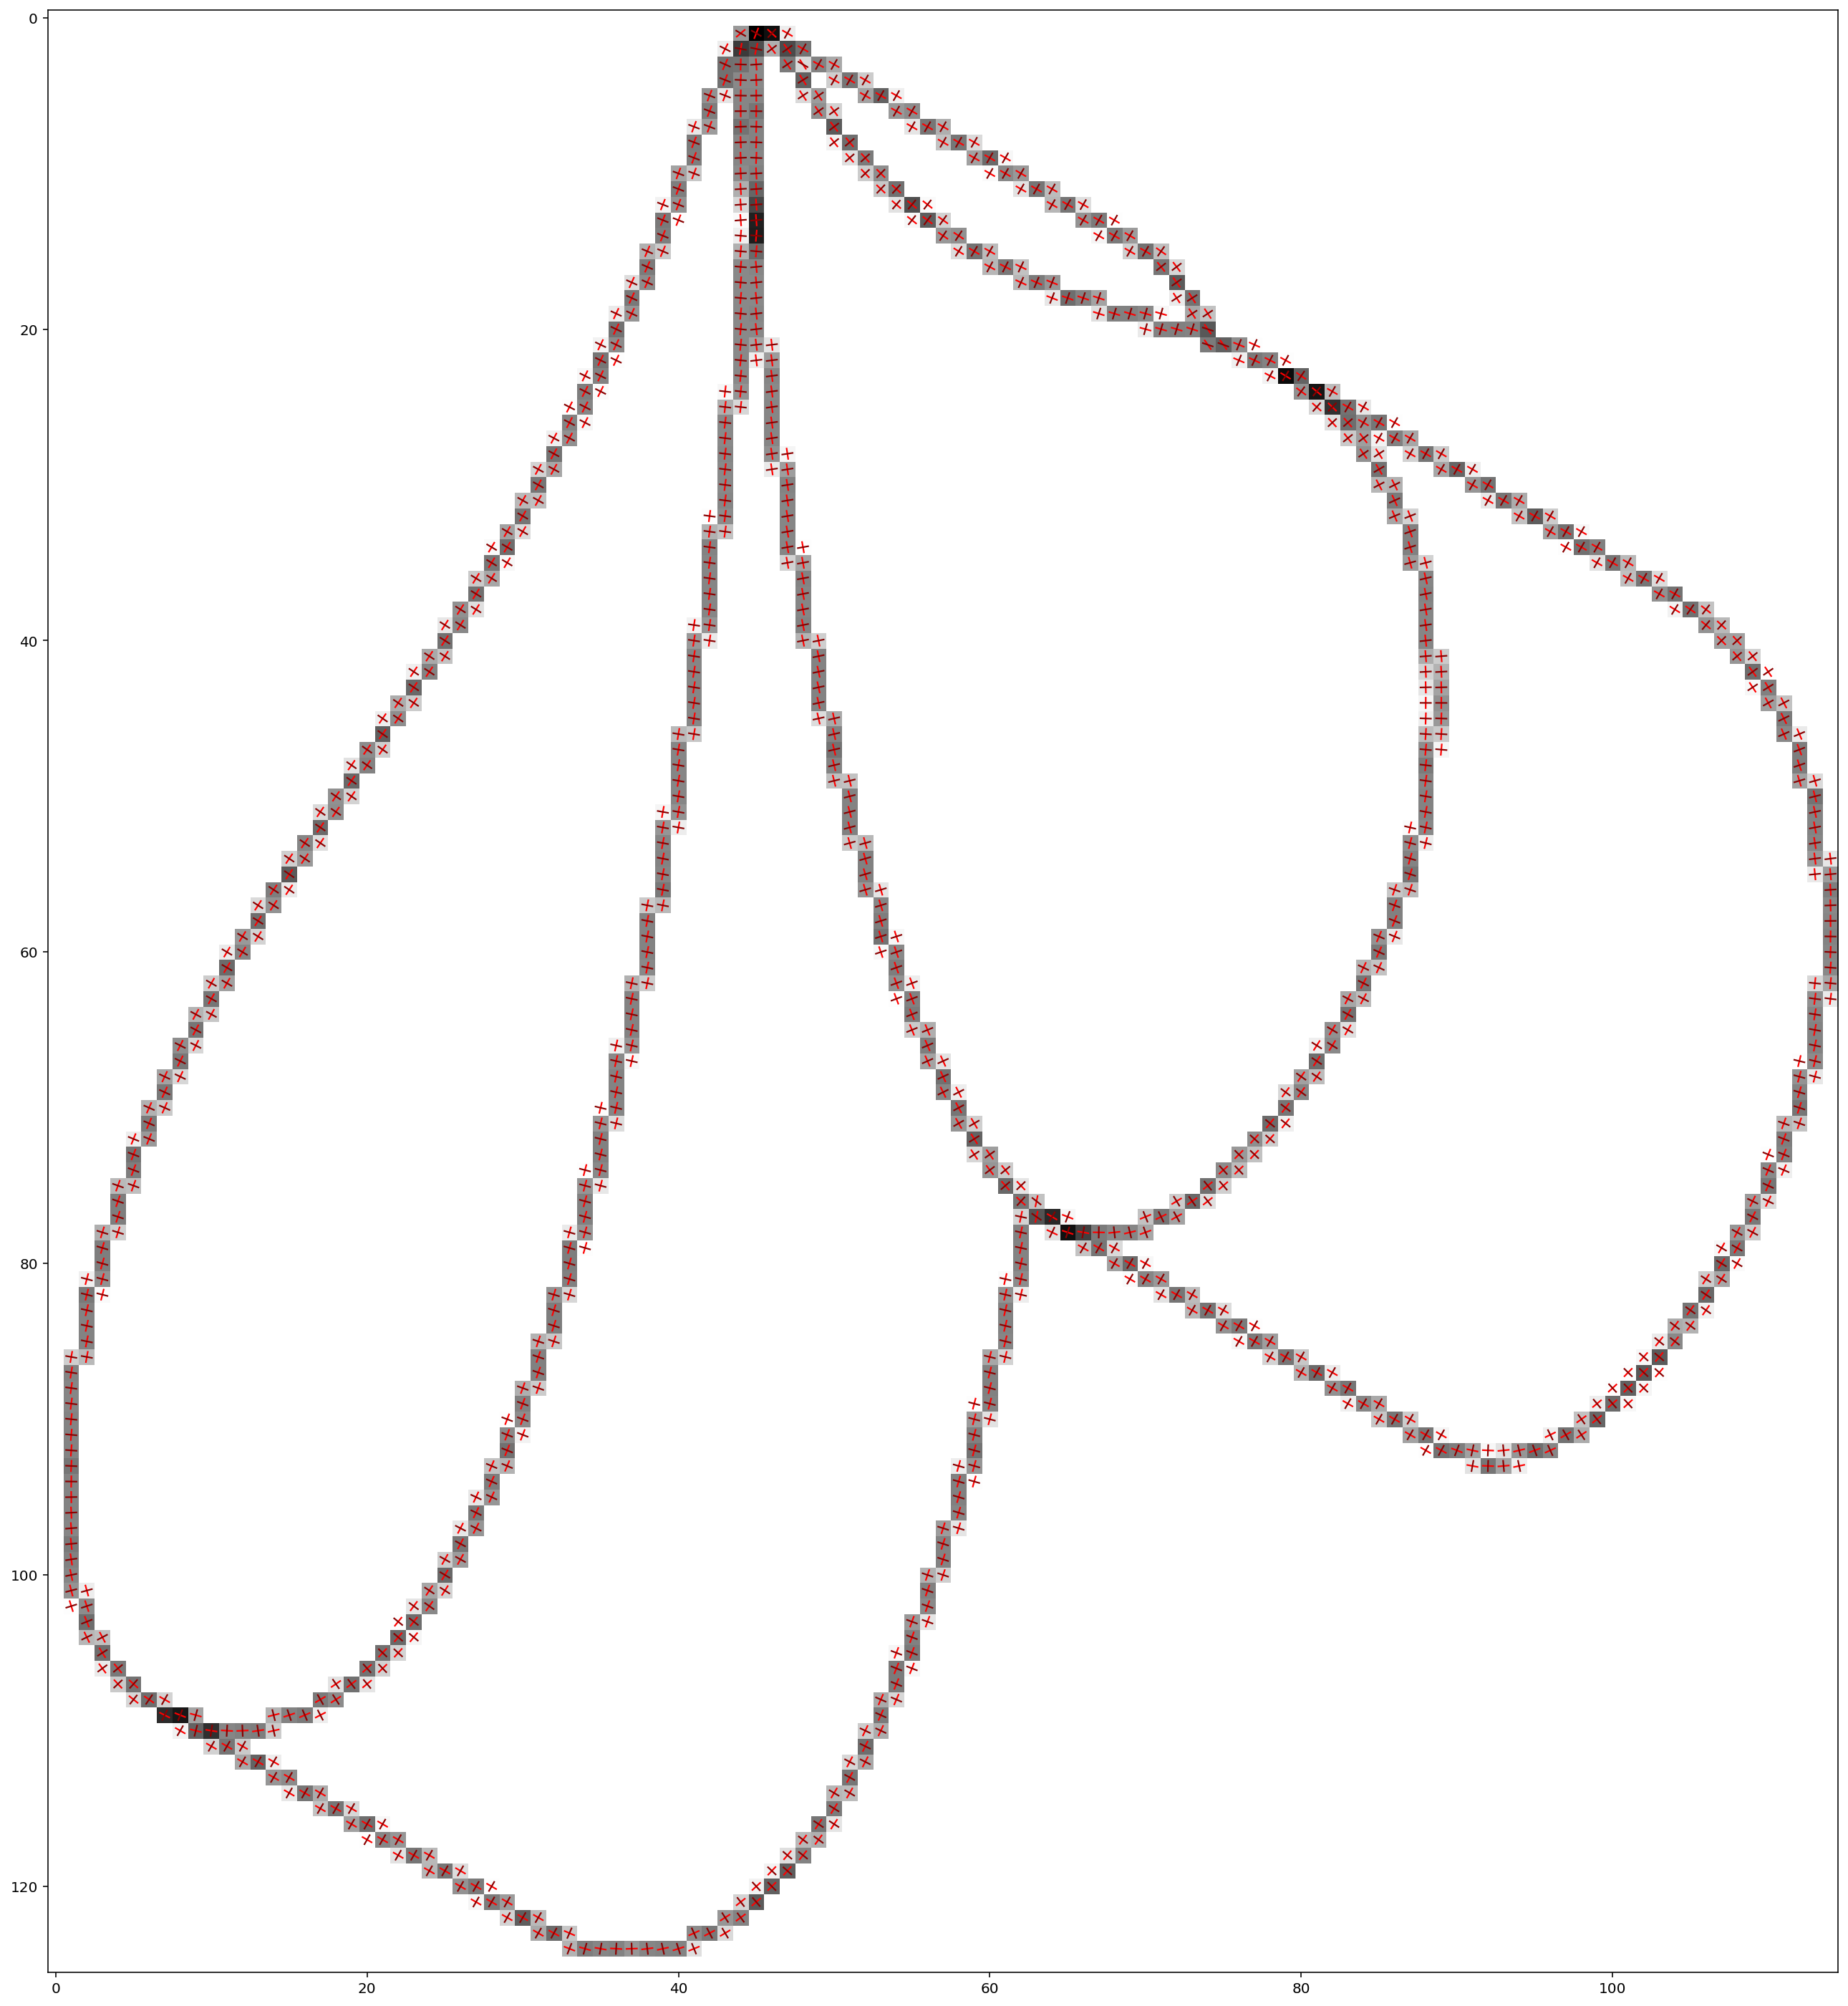

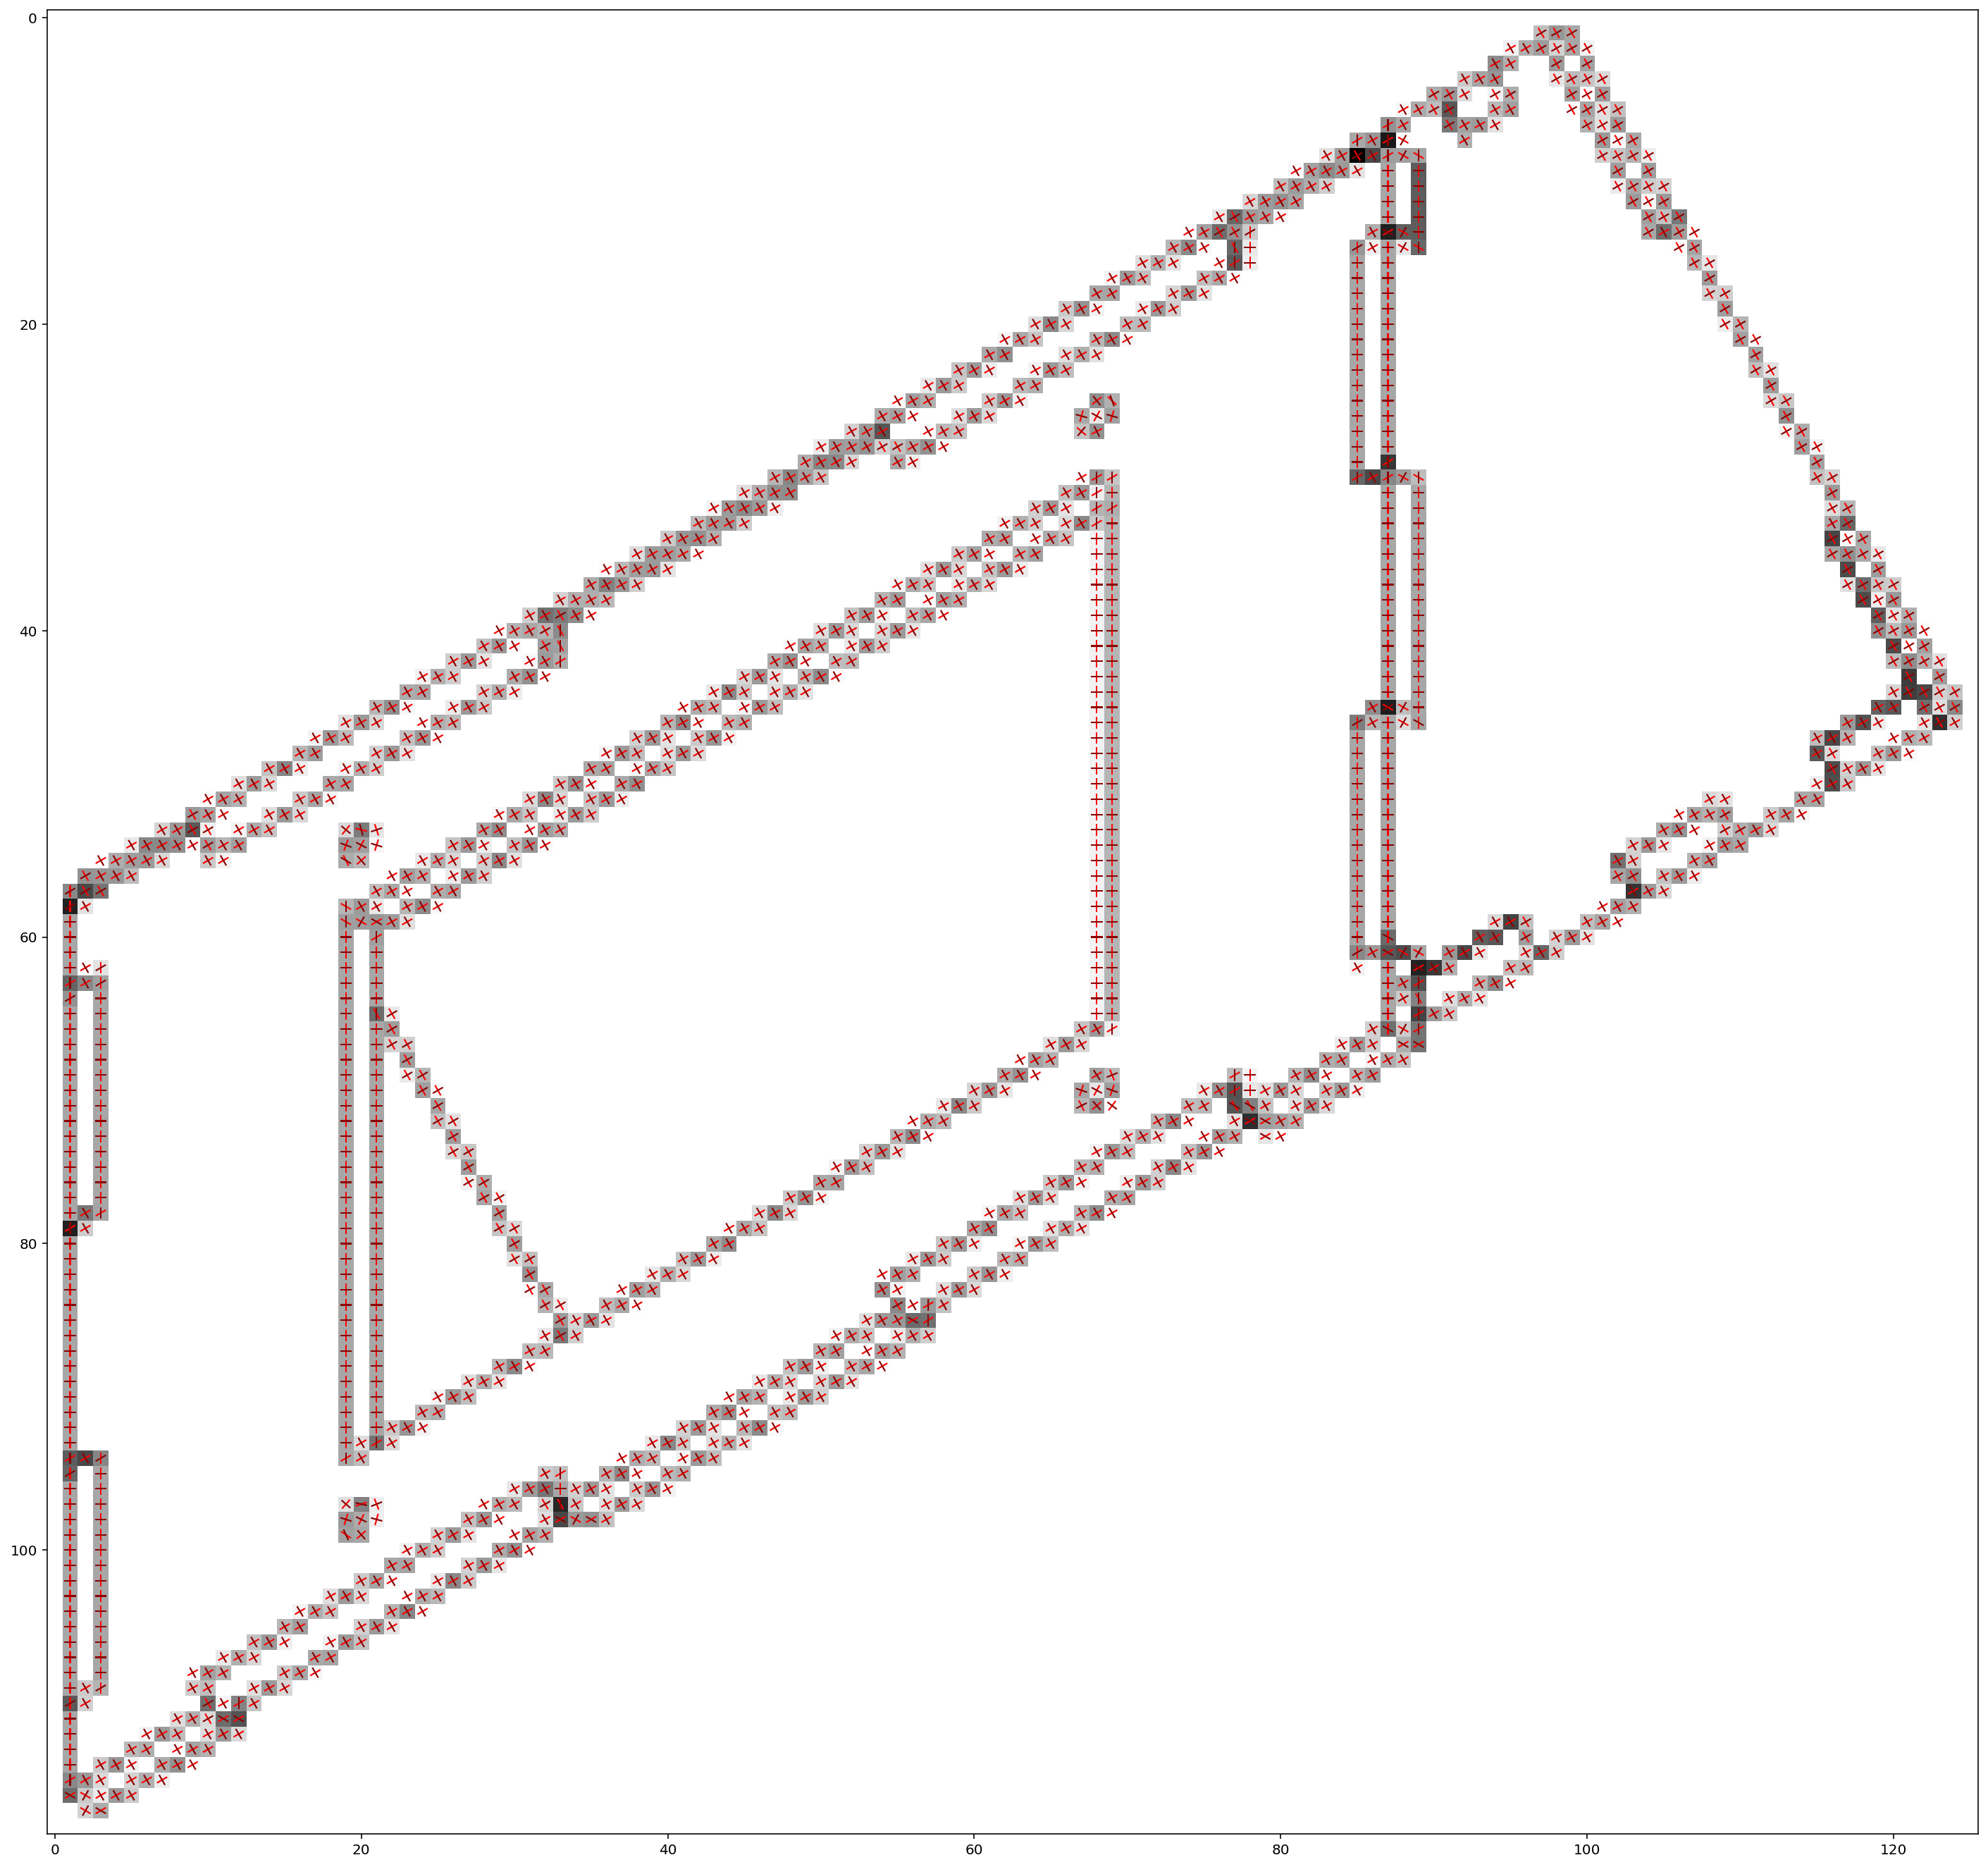

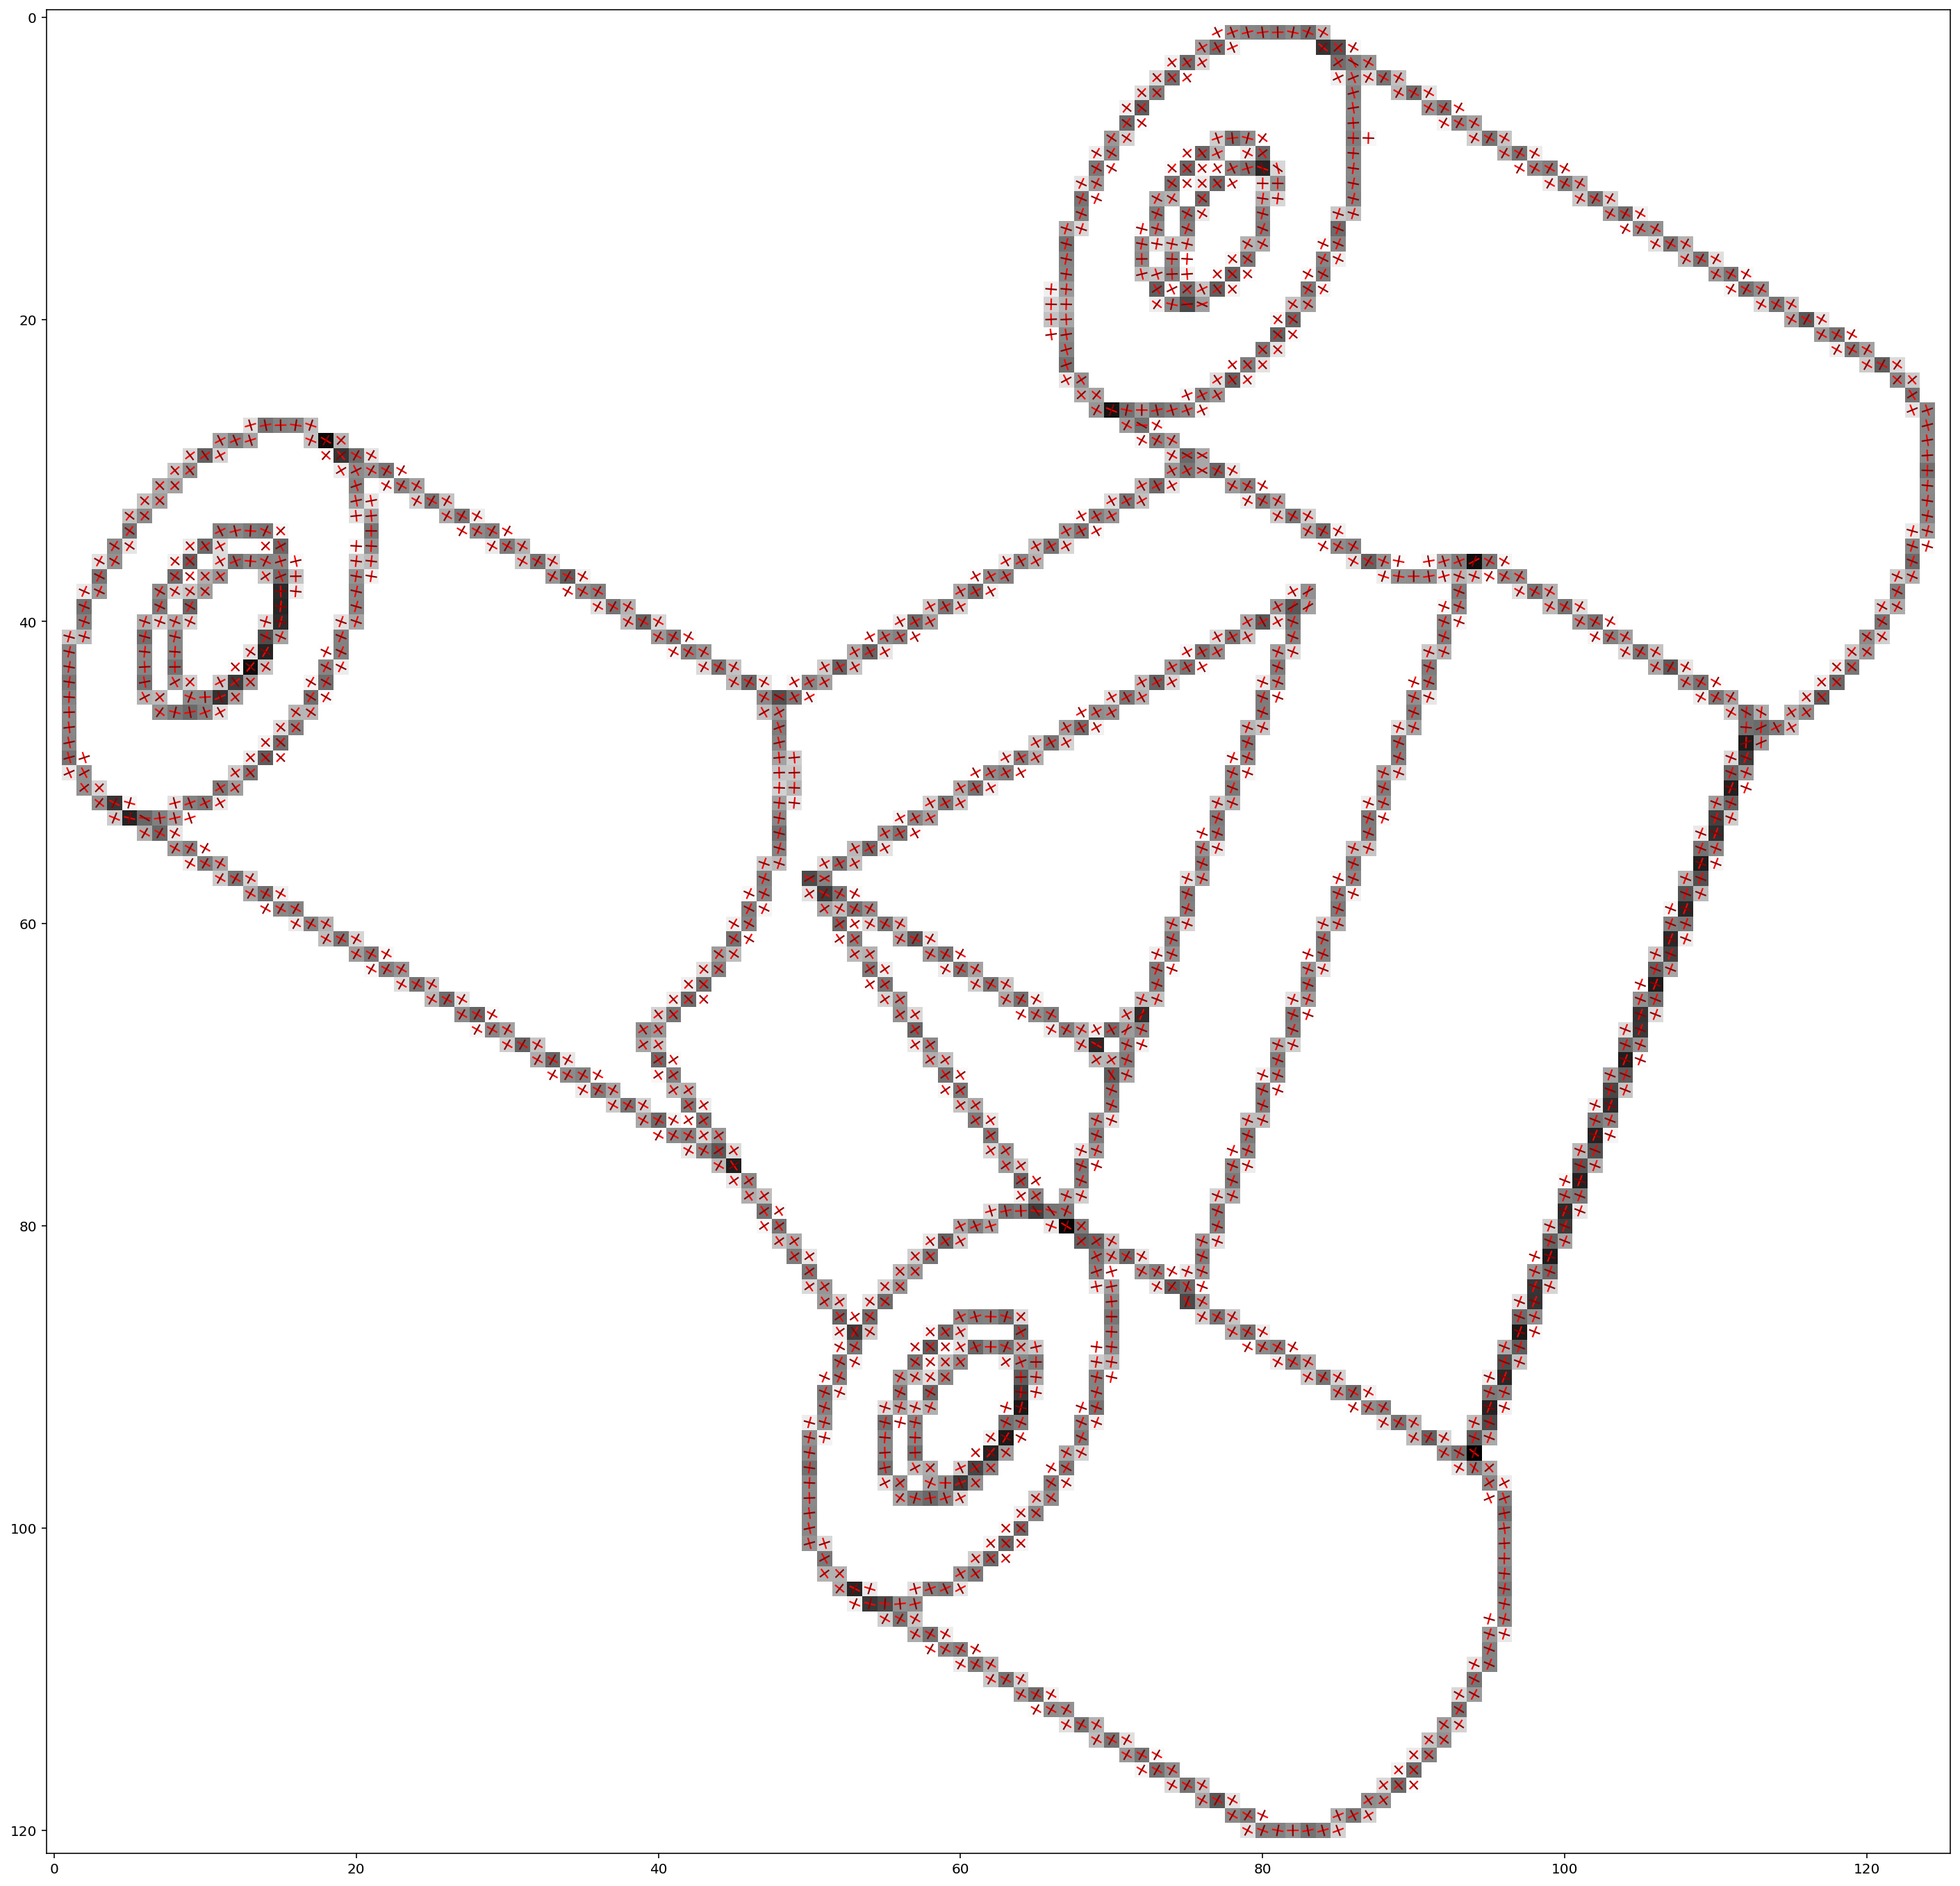

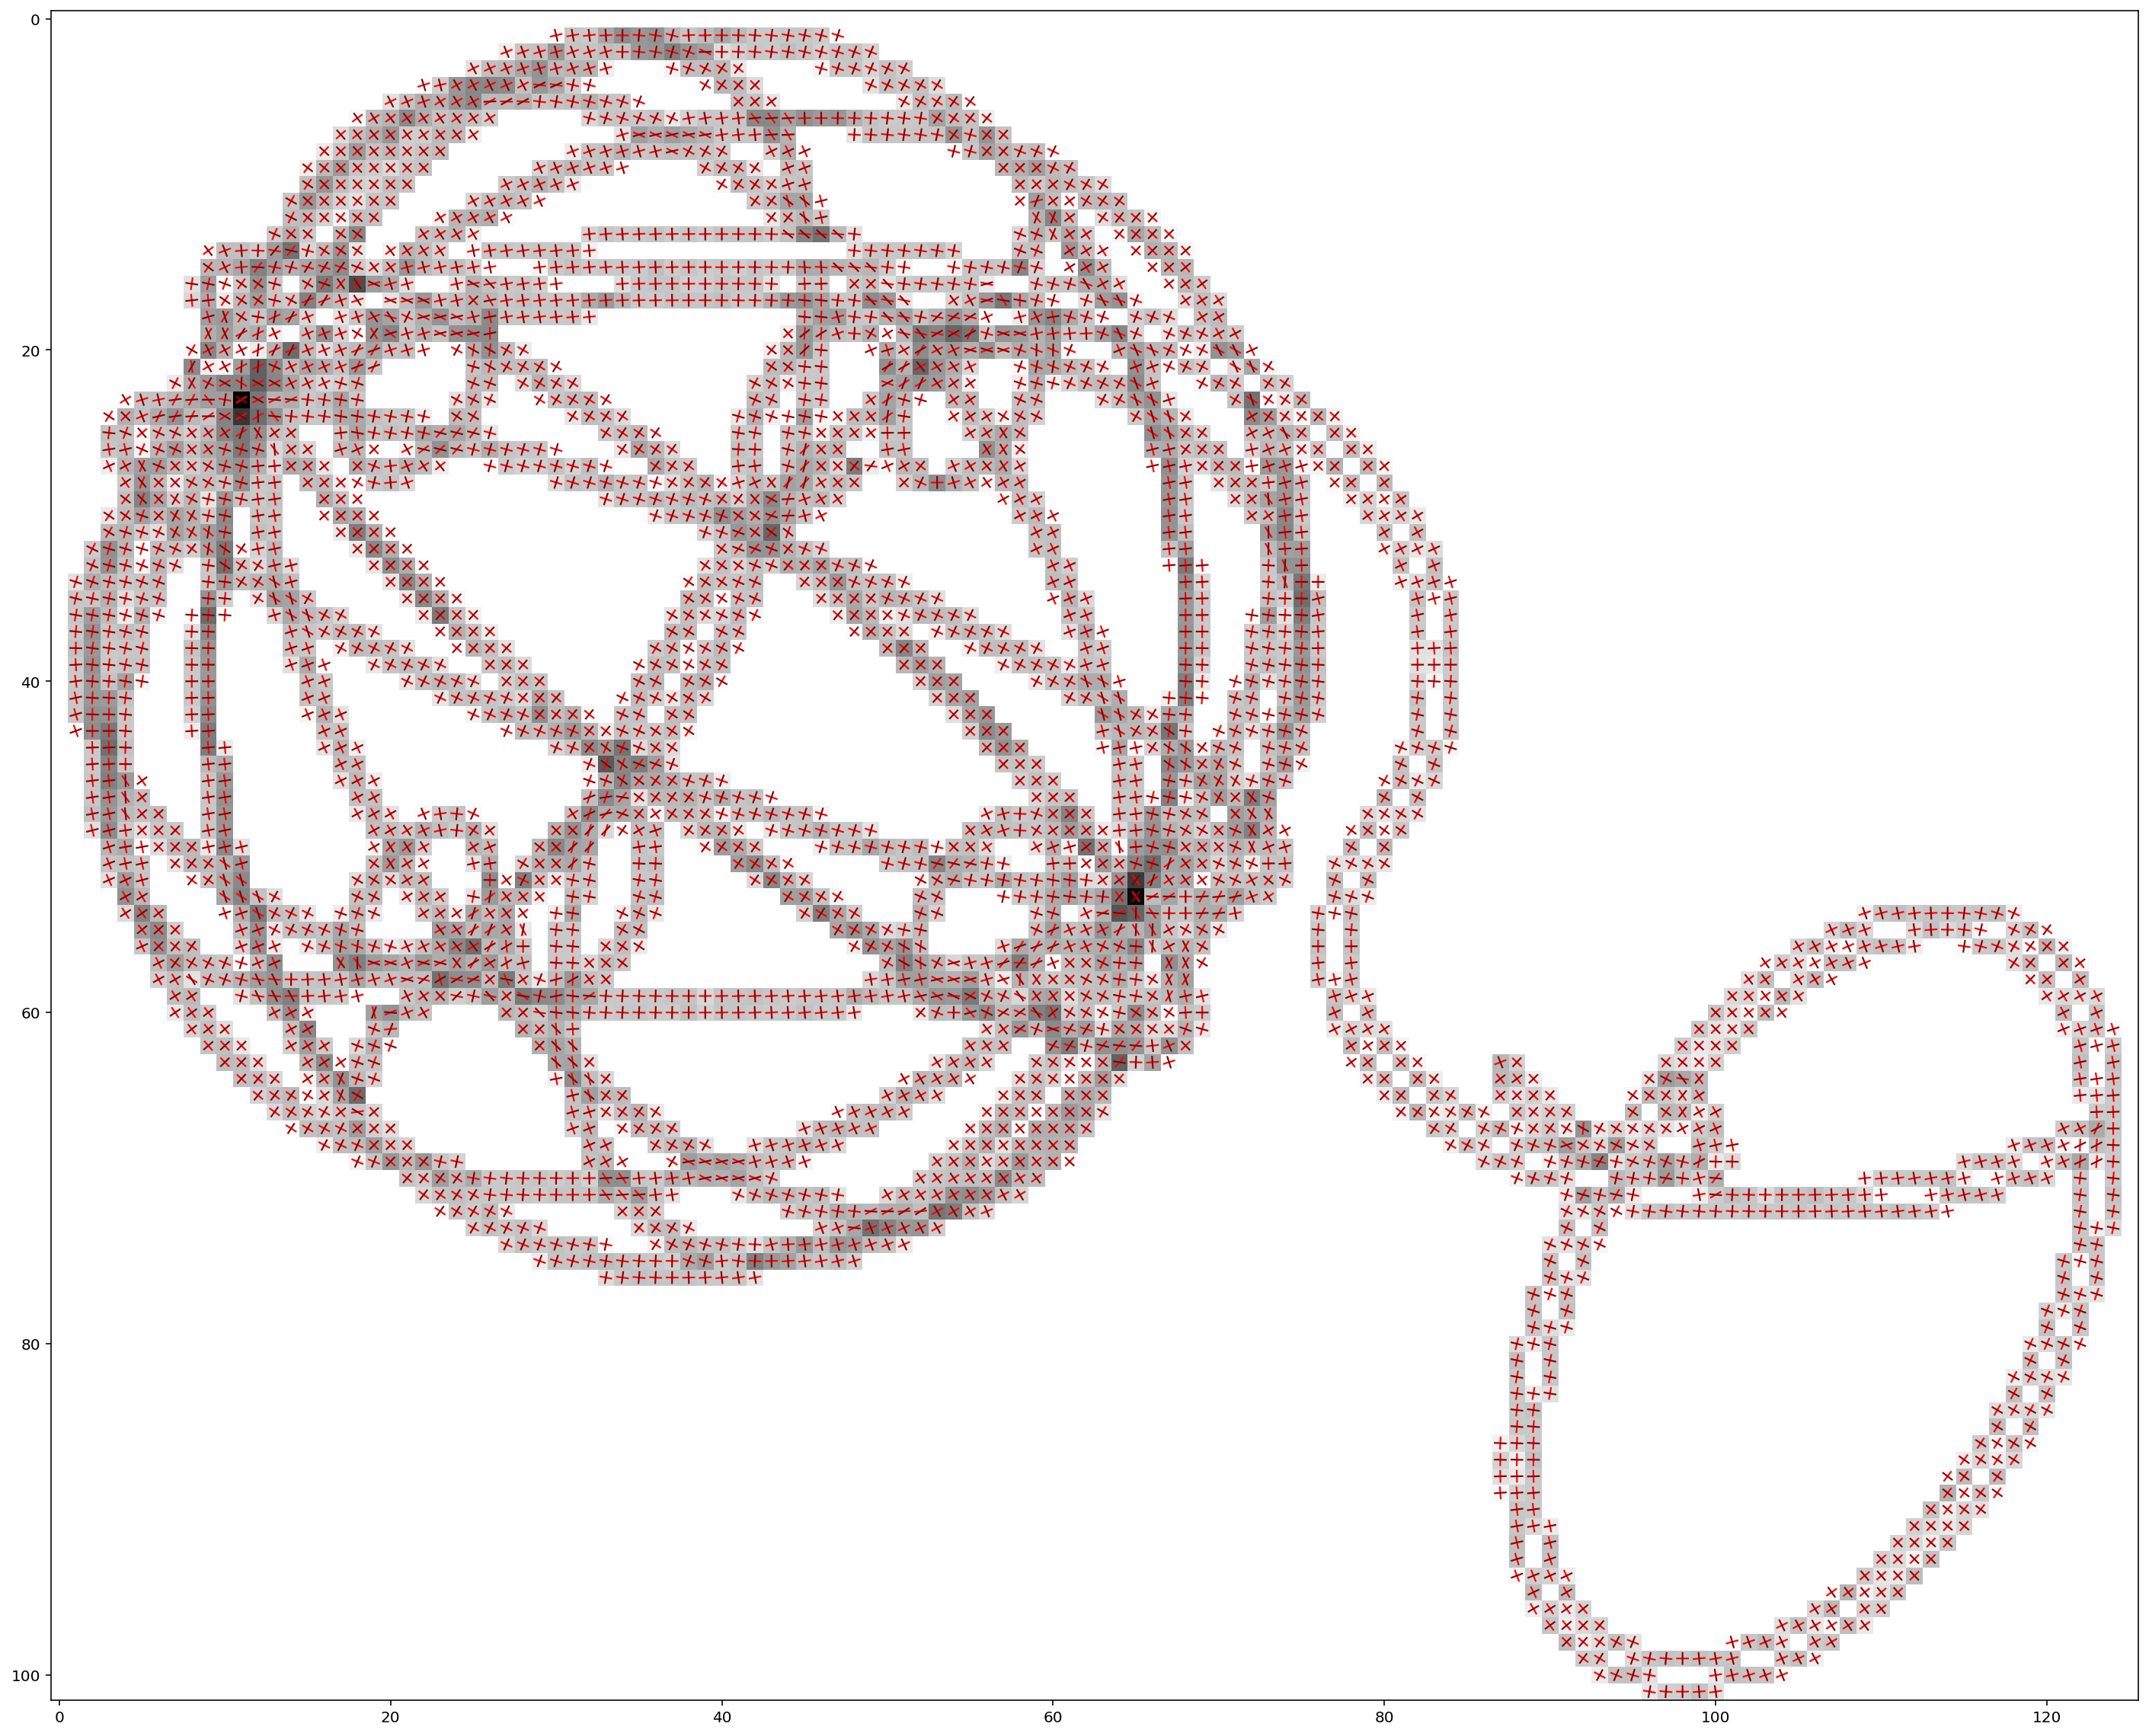

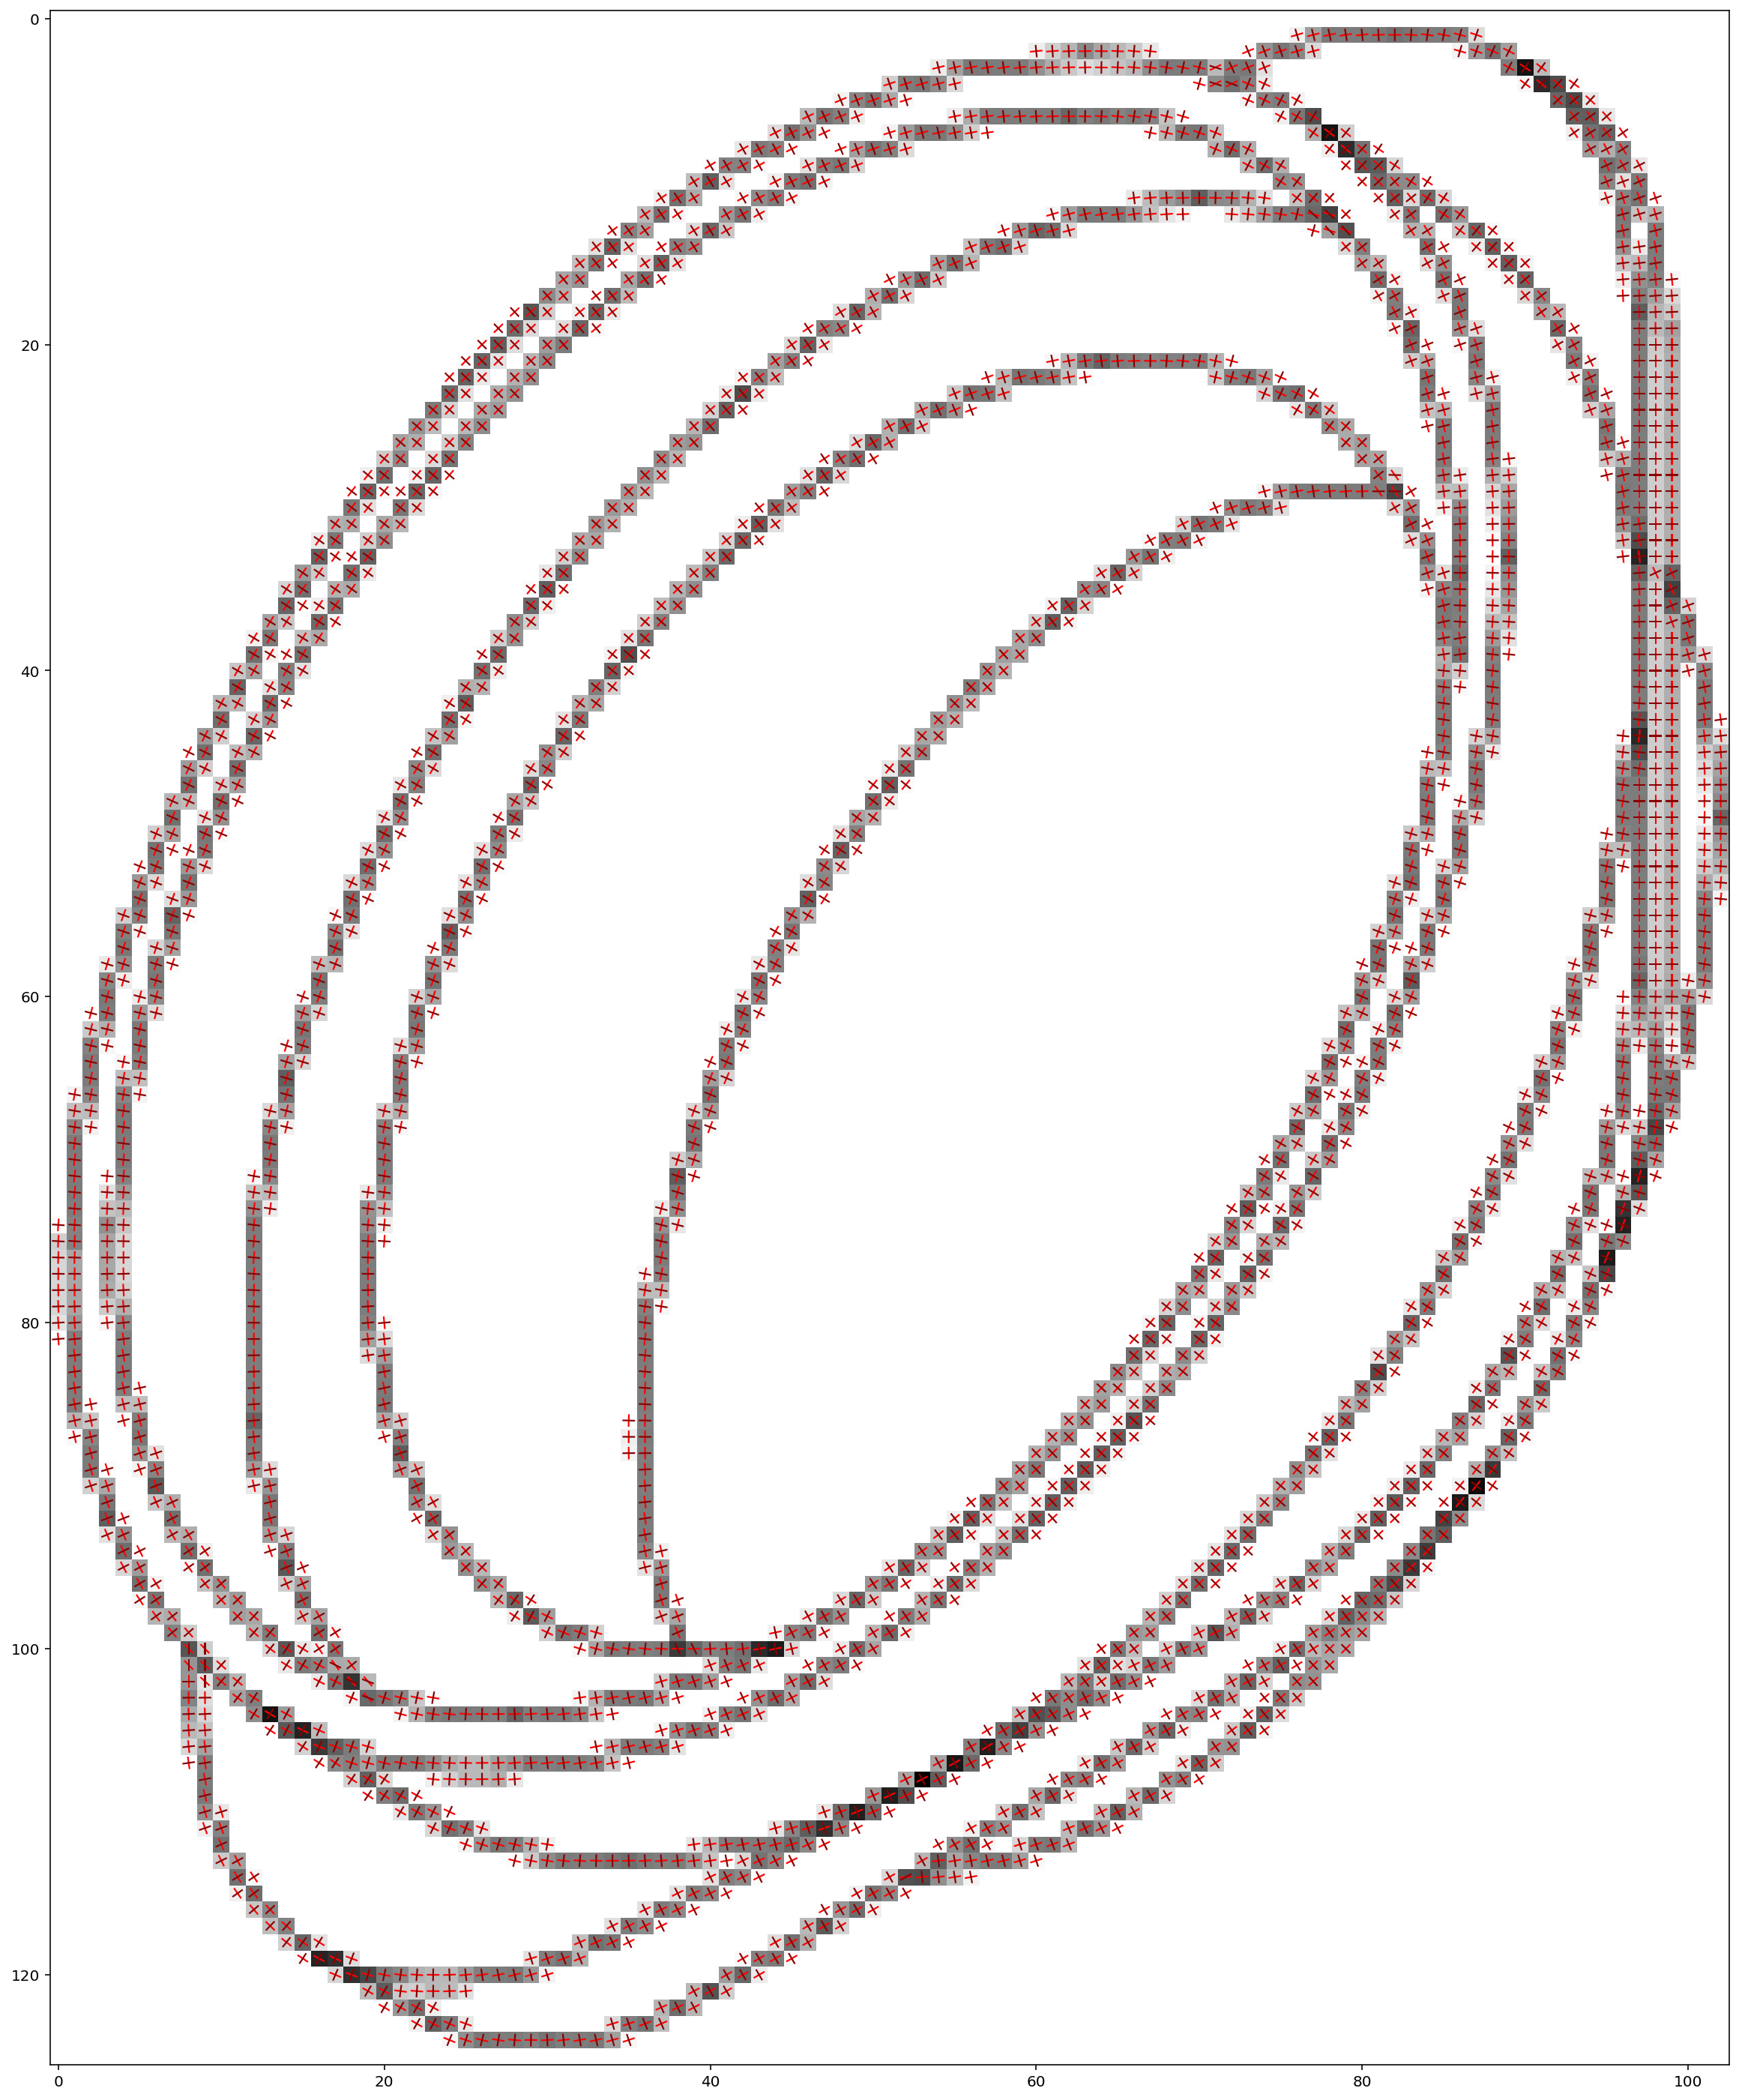

In [5]:
size = 128

for svg_path in tqdm(glob.glob('/home/mtaktash/data/abc_renders/abc_renders/*.svg')[9:14]):

    img = VectorImage.from_svg(svg_path)
    img.scale((size - 2) / (max(int(img.width), int(img.height))), only_coordinates=False)

    raster = img.render(cairo_render)
    
    u, v = compute_field(img, 
                         smoothing_fn=lambda x, y: smooth_field(x, y, fidelity_w=0.3), 
                         alignment_tol=0.1)
        
    draw_polyvector_field(u.detach().cpu().numpy(), v.detach().cpu().numpy(), raster, figscale=0.2) 

In [ ]:
# size = 128

# out_path = '/home/mtaktash/data/abc_field_examples/'
# os.makedirs(out_path, exist_ok=True)

# for svg_path in tqdm(glob.glob('/home/mtaktash/data/abc_renders/abc_renders/*.svg')):
#     img = VectorImage.from_svg(svg_path)
#     img.scale((size - 2) / (max(int(img.width), int(img.height))), only_coordinates=True)

#     raster = img.render(cairo_render)
#     u, v = compute_field(img, 
#                          smoothing_fn=lambda x, y: smooth_field(x, y, fidelity_w=0.3), 
#                          alignment_tol=0.1)
    
#     np.save(
#         os.path.join(out_path, os.path.basename(svg_path)[:-4] + '_field.npy'), 
#         np.vstack([u.detach().cpu().numpy(), v.detach().cpu().numpy()])
#     )
#     np.save(os.path.join(out_path, os.path.basename(svg_path)[:-4] + '_raster.npy'), raster)

(<Figure size 1108.8x1814.4 with 1 Axes>,
 <matplotlib.quiver.Quiver at 0x7fb8409b2090>)

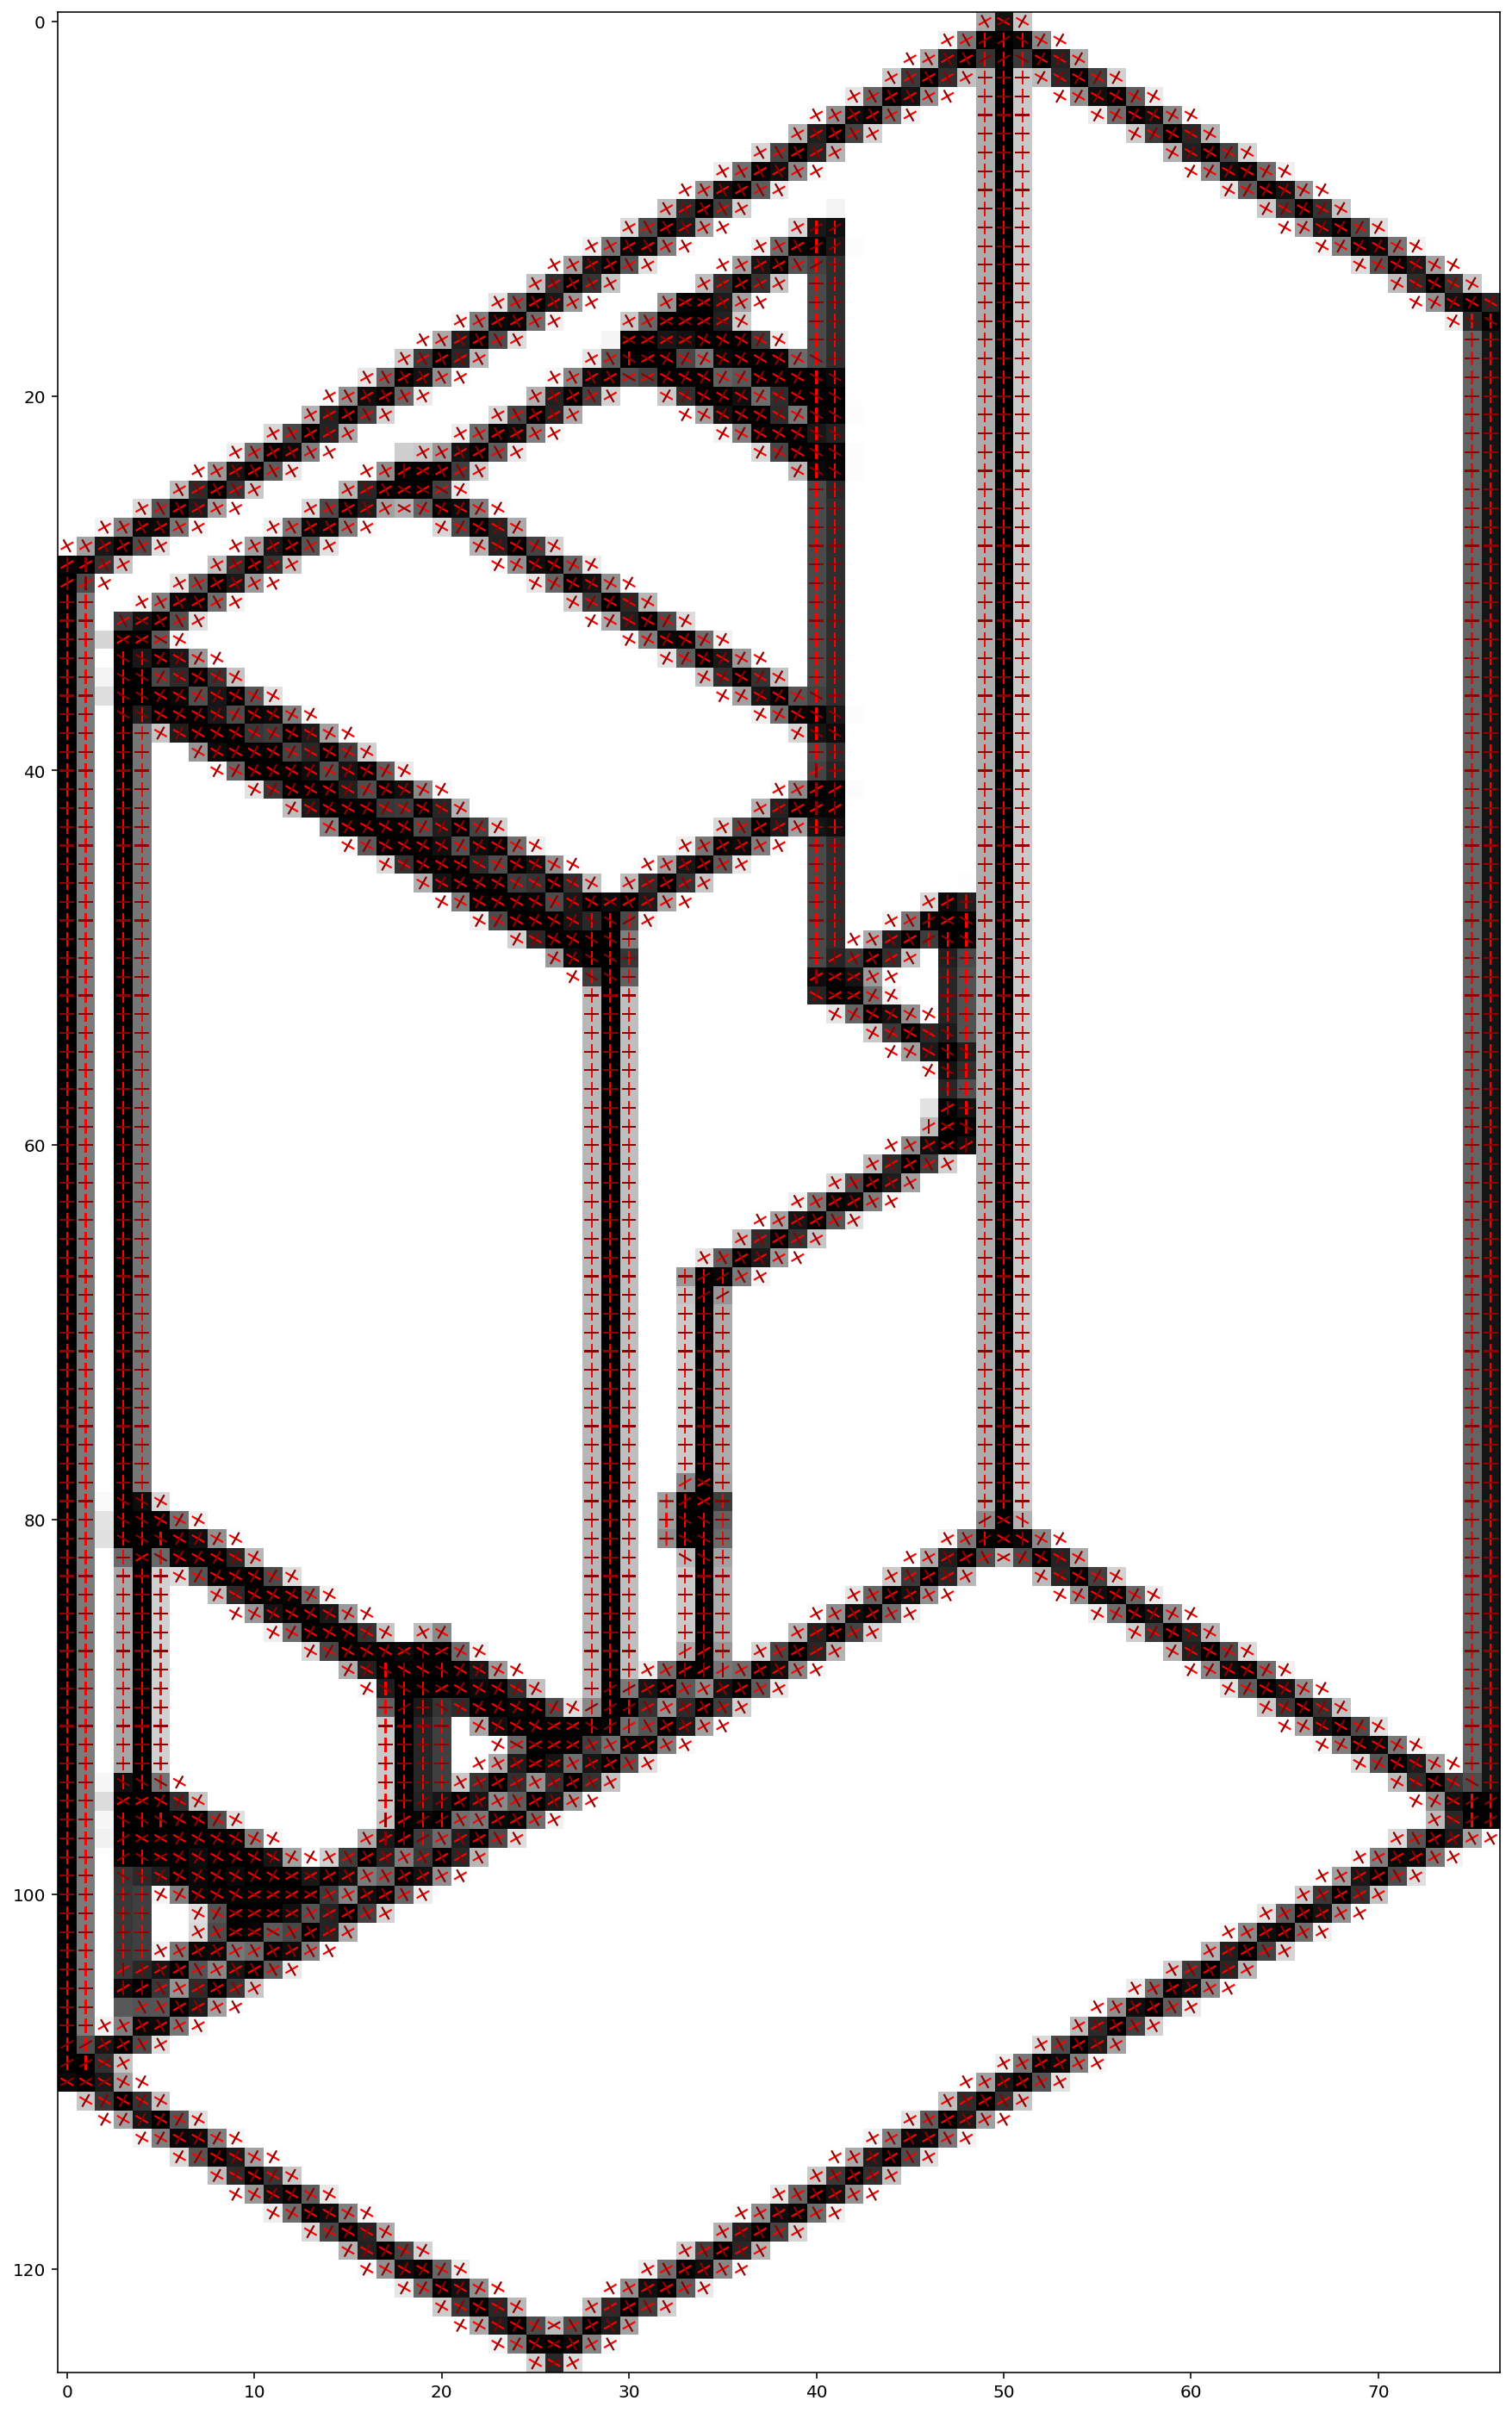

In [8]:
field = np.load("../scripts/00050085_b1d1786087a44ab082d0ad50_step_000_field.npy")
raster = np.load("../scripts/00050085_b1d1786087a44ab082d0ad50_step_000_raster.npy")

draw_polyvector_field(field[:2], field[2:], raster, figscale=0.2);

In [10]:
img = VectorImage.from_svg(
    "/home/mtaktash/data/vectorization/abc/train/00051617_4d30baebd41e4ec88042e9ef_step_000.svg")

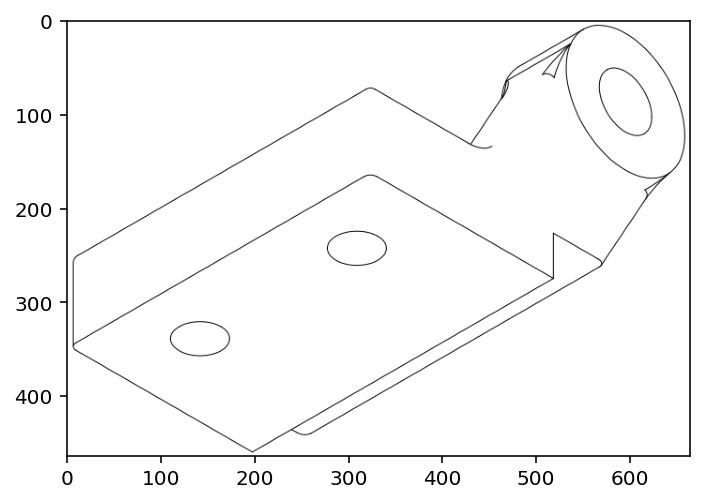

In [13]:
plt.imshow(img.render(cairo_render), cmap='gray')

In [27]:
patches = img.split_to_patches(patch_size=(400, 400))
patches.shape

(2, 2)

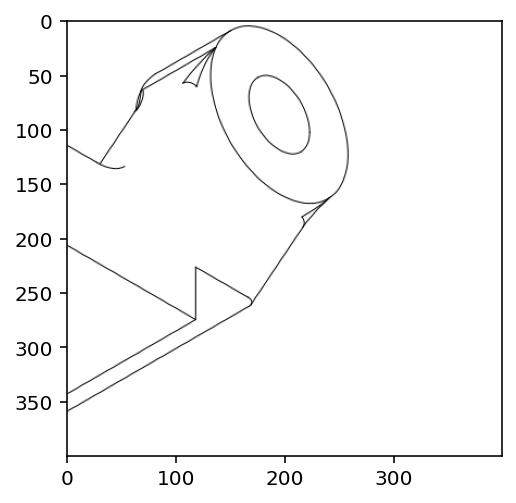

In [28]:
plt.imshow(patches[0][0].render(cairo_render), cmap='gray')
plt.imshow(patches[0][1].render(cairo_render), cmap='gray')